# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


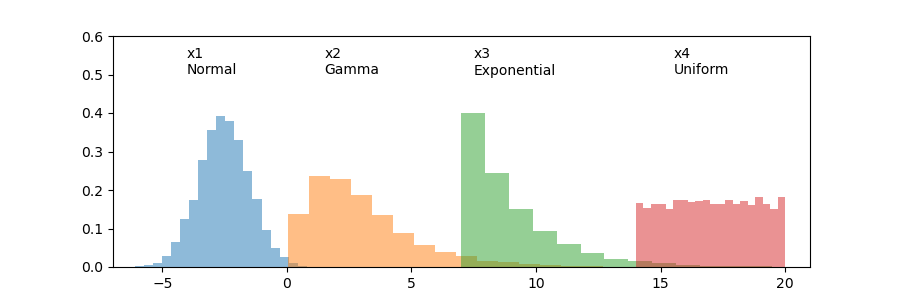

Text(15.522167256517736, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

## Libraries

In [47]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt, animation, gridspec

%matplotlib notebook

## Update function (Animation)

<IPython.core.display.Javascript object>


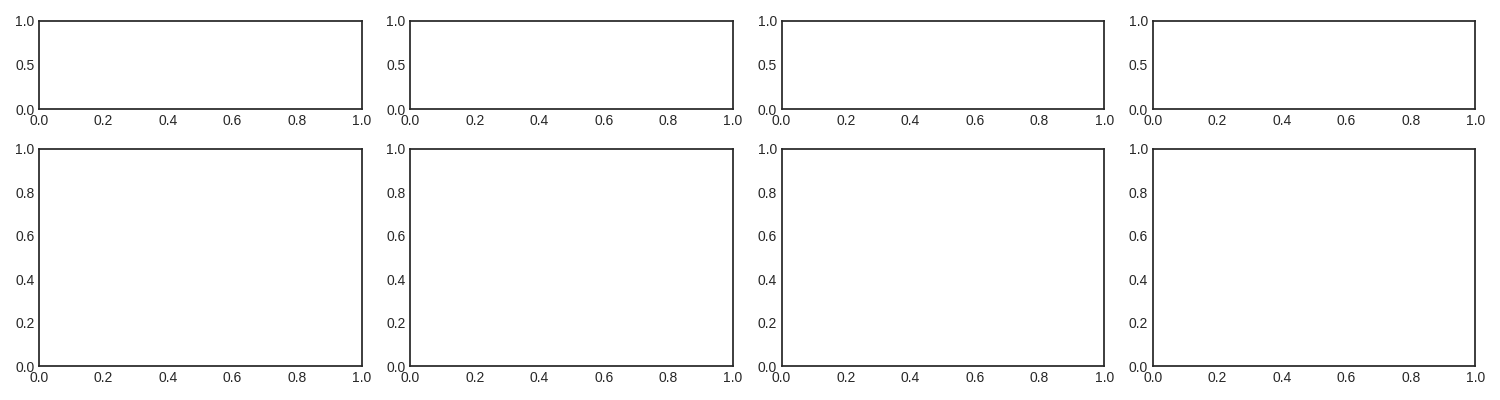

In [64]:
#----------- Random Variables ----------#

sample_size = int(1e4)
samples = {
    'Normal': stats.norm.rvs(0, 1, sample_size),
    'Gamma': stats.gamma.rvs(2, 1.5, sample_size),
    'Exponential': stats.expon.rvs(1, sample_size),
    'Uniform': stats.uniform.rvs(0, 1, sample_size)
}

#--------- Set figure and axis ---------#

fig = plt.figure(figsize = (15, 4), dpi = 100)
gs = fig.add_gridspec(ncols = 4, nrows = 3, figure = fig)

# Box and whisker plots
axs_box = [fig.add_subplot(gs[0, i]) for i in range(4)]

# Histograms
axs_hist = [fig.add_subplot(gs[1:3, i], sharex = axs_box[i]) for i in range(4)]

#---------------- Style ----------------#

# Remove spines
    
# Layout
plt.tight_layout()

## Perform animation

<IPython.core.display.Javascript object>


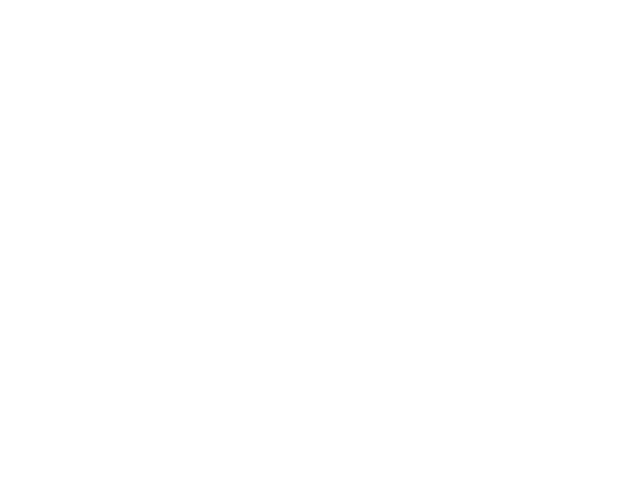